In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


class AutoEncoder(tf.keras.Model):
    def __init__(self, input_shape=(28, 28, 1)):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=input_shape),
                tf.keras.layers.Conv2D(
                    16, (3, 3), activation="relu", padding="same", strides=2
                ),
                tf.keras.layers.Conv2D(
                    8, (3, 3), activation="relu", padding="same", strides=2
                ),
            ]
        )
        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.Conv2DTranspose(
                    8, kernel_size=3, strides=2, activation="relu", padding="same"
                ),
                tf.keras.layers.Conv2DTranspose(
                    16, kernel_size=3, strides=2, activation="relu", padding="same"
                ),
                tf.keras.layers.Conv2D(
                    1, kernel_size=(3, 3), activation="sigmoid", padding="same"
                ),
            ]
        )

    def decode(self, x):
        return self.decoder(x)

    def encode(self, x):
        return self.encoder(x)

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def summary(self):
        self.encoder.summary()
        self.decoder.summary()

In [6]:
def plot_reconstructed_images_and_encodings(original, encodings, reconstructed):
    n = original.shape[0]
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(original[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Original Images", loc="left", fontsize=20)
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(encodings[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Encodings", loc="left", fontsize=20)
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(reconstructed[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Reconstructed Images", loc="left", fontsize=20)
    plt.show()

In [7]:
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9
fashion_mnist = tf.keras.datasets.fashion_mnist  # 28x28 images of clothing items

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0  # normalize pixel values to be between 0 and 1
x_test = x_test / 255.0

In [8]:
model1 = AutoEncoder()
model1.compile(optimizer="adam", loss="mse")
model1.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1596/1875 [========================>.....] - ETA: 1s - loss: 0.0127

In [ ]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 4)           292       
                                                                 
Total params: 1,612
Trainable params: 1,612
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_7 (Conv2DT  (32, 8, 8, 4)            148       
 ranspose)                                                       
                              

1/1 [==============================] - 0s 211ms/step


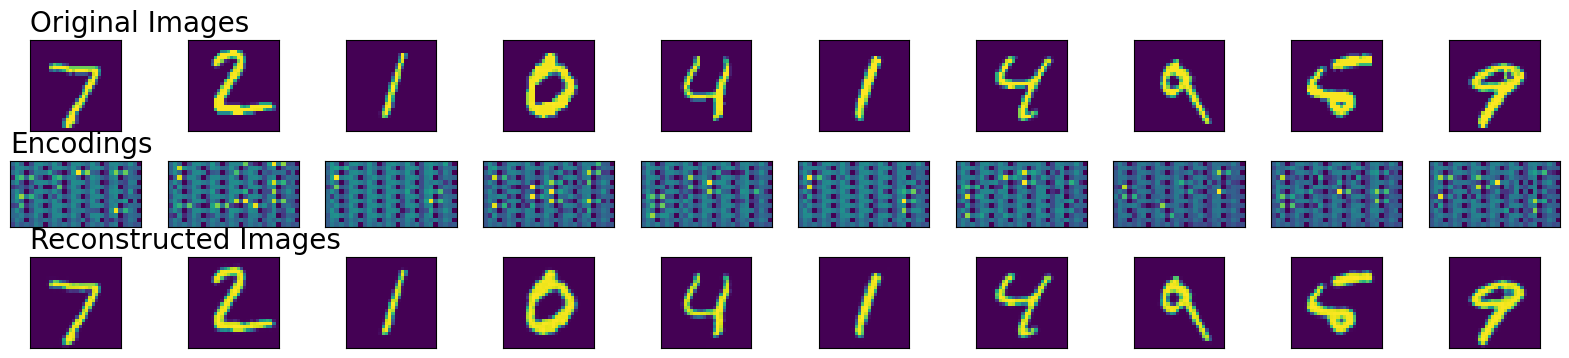

In [ ]:
plot_reconstructed_images_and_encodings(
    x_test[:10],
    tf.reshape(model1.encode(x_test[:10]), (10, 10, -1)),
    model1.predict(x_test[:10]),
)

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0  # normalize pixel values to be between 0 and 1
x_test = x_test / 255.0
model2 = AutoEncoder(input_shape=(28, 28, 1))
model2.compile(optimizer="adam", loss="mse")
model2.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0121 - val_loss: 0.0048
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [ ]:
model2.summary()

Model: "auto_encoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 7, 7, 8)           1320      
                                                                 
 sequential_3 (Sequential)   (None, 28, 28, 1)         1897      
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step


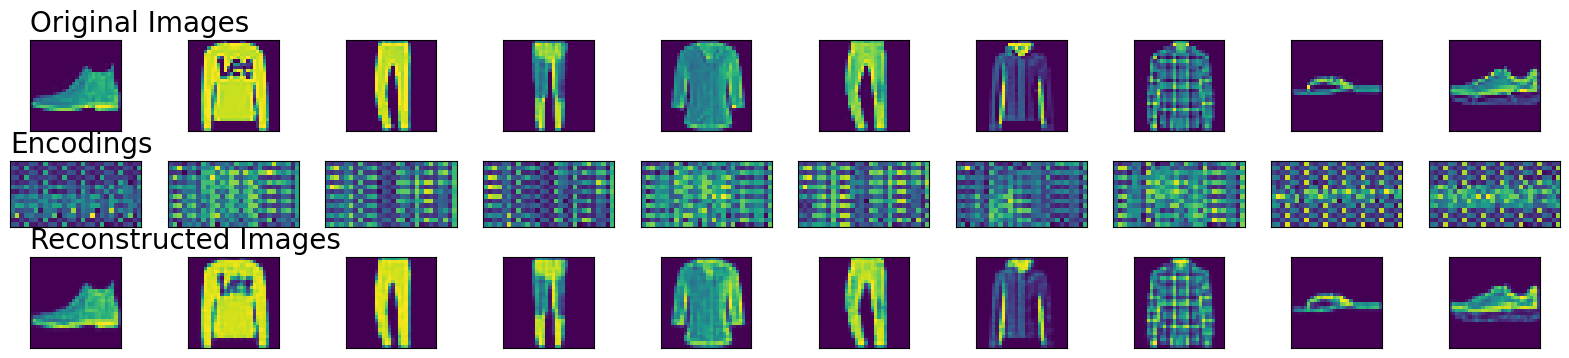

In [ ]:
plot_reconstructed_images_and_encodings(
    x_test[:10],
    tf.reshape(model2.encode(x_test[:10]), (10, 10, -1)),
    model2.predict(x_test[:10]),
)